In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/graduate-admissions/Admission_Predict.csv
/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('/kaggle/input/graduate-admissions/Admission_Predict.csv')
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

- ##### **Chance of Admit** is the target variable or the one which has to be predicted.
- ##### Except **Serial No.** first the 7 columns are predictor variables.

In [5]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


- ##### We can understand preliminary behaviour of numerical data using describe function.
- ##### We can know the distribution of data through mean, minimum ans standard deviation.
- ##### For example, **CGPA** has min = 6.8 and max = 9.92.
- ##### Quartiles give an idea about outliers.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


- ##### There is no categorical or text variables. 
- ##### info function gives basic information about data such as class, rows, columns, columns name with their respective datatypes, tells which columns has null values and memory usage.
- ##### There are no missing values present in the data set.

In [7]:
data = data.drop('Serial No.', axis=1)

In [8]:
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [9]:
x=data.drop('Chance of Admit ',axis=1)

In [10]:
y=data['Chance of Admit ']

In [11]:
# Importing the train test split function
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x,y, random_state=56)

### **Feature Scaling**

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
sc = StandardScaler()

In [14]:
train_x = sc.fit_transform(train_x)
test_x = sc.transform(test_x)

In [15]:
train_x

array([[-0.32682143, -0.89825547, -0.09730704, ..., -0.4834979 ,
        -0.52632859, -1.09077084],
       [-1.12250933, -0.73014777,  1.67191182, ...,  0.59493608,
         0.10335964, -1.09077084],
       [ 1.70660318,  1.79146772,  1.67191182, ...,  0.59493608,
         1.03938268,  0.91678285],
       ...,
       [ 0.82250552,  0.61471382,  1.67191182, ...,  0.59493608,
         1.10745708,  0.91678285],
       [ 0.46886646,  1.11903692,  1.67191182, ...,  0.59493608,
         0.61391766,  0.91678285],
       [ 0.82250552,  0.44660612, -0.09730704, ...,  0.05571909,
         0.30758284,  0.91678285]])

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

### **Model Training**

In [17]:
lr =LinearRegression()
lr.fit(train_x, train_y)

svm = SVR()
svm.fit(train_x, train_y)

rf = RandomForestRegressor()
rf.fit(train_x, train_y)

gr = GradientBoostingRegressor()
gr.fit(train_x, train_y)

GradientBoostingRegressor()

### **Prediction on Test Data**

In [18]:
y_pred1 = lr.predict(test_x)
y_pred2 = svm.predict(test_x)
y_pred3 = rf.predict(test_x)
y_pred4 = gr.predict(test_x)

In [19]:
from sklearn import metrics

In [20]:
score1 = metrics.r2_score(test_y,y_pred1)
score2 = metrics.r2_score(test_y,y_pred2)
score3 = metrics.r2_score(test_y,y_pred3)
score4 = metrics.r2_score(test_y,y_pred4)

In [21]:
print(score1,score2,score3,score4)

0.7998810384678705 0.7285602971016962 0.7726620660744241 0.7638397541115917


In [22]:
final_data = pd.DataFrame({'Models':['LR','SVR','RF','GR'],
                          'R2_SCORE':[score1,score2,score3,score4]})
final_data

,Models,R2_SCORE
0,LR,0.799881
1,SVR,0.728560
2,RF,0.772662
3,GR,0.763840


<Axes: xlabel='Models', ylabel='R2_SCORE'>

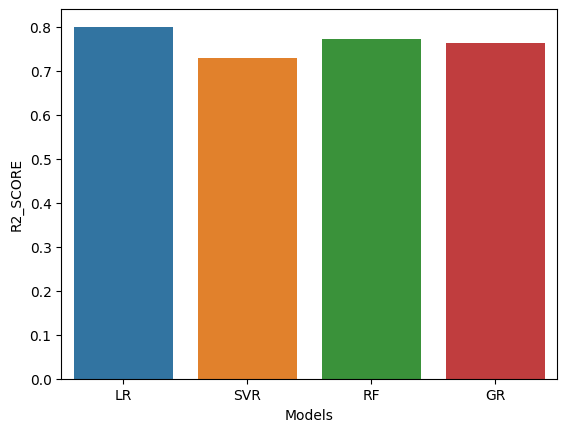

In [23]:
sns.barplot(x=final_data['Models'], y=final_data['R2_SCORE'])

### **Classification**

In [24]:
train_y = [1 if value>0.8 else 0 for value in train_y]
test_y = [1 if value>0.8 else 0 for value in test_y]

train_y = np.array(train_y)
test_y = np.array(test_y)

train_y

array([0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0])

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

### Model Training & Evaluation

In [26]:
lr = LogisticRegression()
lr.fit(train_x,train_y)
y_pred1= lr.predict(test_x)
print(accuracy_score(test_y, y_pred1))

0.89


In [27]:
svm = svm.SVC()
svm.fit(train_x, train_y)
y_pred2 = svm.predict(test_x)
print(accuracy_score(test_y, y_pred2))

0.92


In [28]:
knn=KNeighborsClassifier()
knn.fit(train_x,train_y)
y_pred3 = knn.predict(test_x)
print(accuracy_score(test_y,y_pred3))

0.9


In [29]:
rf = RandomForestClassifier()
rf.fit(train_x, train_y)
y_pred4 = rf.predict(test_x)
print(accuracy_score(test_y,y_pred4))

0.88


In [30]:
gr = GradientBoostingClassifier()
gr.fit(train_x,train_y)
y_pred5 = gr.predict(test_x)
print(accuracy_score(test_y,y_pred5))

0.88


In [31]:
final_data = pd.DataFrame({'Models':['LR','SVC','KNN','RF','GBC'],
                           'ACC_SCORE':[accuracy_score(test_y,y_pred1),
                                       accuracy_score(test_y,y_pred2),
                                       accuracy_score(test_y,y_pred3),
                                       accuracy_score(test_y,y_pred4),
                                       accuracy_score(test_y,y_pred5)]})

final_data

,Models,ACC_SCORE
0,LR,0.89
1,SVC,0.92
2,KNN,0.90
3,RF,0.88
4,GBC,0.88


<Axes: xlabel='Models', ylabel='ACC_SCORE'>

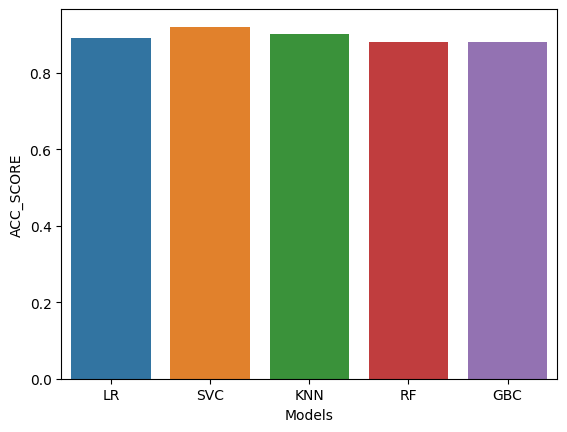

In [32]:
sns.barplot(x=final_data['Models'], y=final_data['ACC_SCORE'])

### Save the Model

In [33]:
y = [1 if value>0.8 else 0 for value in y]
y = np.array(y)
y

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,

In [34]:
x = sc.fit_transform(x)
x

array([[ 1.76210664,  1.74697064,  0.79882862, ...,  1.16732114,
         1.76481828,  0.90911166],
       [ 0.62765641, -0.06763531,  0.79882862, ...,  1.16732114,
         0.45515126,  0.90911166],
       [-0.07046681, -0.56252785, -0.07660001, ...,  0.05293342,
        -1.00563118,  0.90911166],
       ...,
       [ 1.15124883,  1.41704229,  0.79882862, ...,  1.16732114,
         1.42900622,  0.90911166],
       [-0.41952842, -0.72749202, -0.07660001, ...,  0.61012728,
         0.30403584, -1.09997489],
       [ 1.41304503,  1.58200646,  0.79882862, ...,  0.61012728,
         1.78160888,  0.90911166]])

In [35]:
gr = GradientBoostingClassifier()
gr.fit(x,y)

GradientBoostingClassifier()

In [36]:
import joblib

In [37]:
joblib.dump(gr,'admission_model')

['admission_model']

In [38]:
model = joblib.load('admission_model')

In [39]:
model.predict(sc.transform([[337,118,4,4.5,4.5,9.65,1]]))

array([1])

In [40]:
from tkinter import *
import joblib
from sklearn.preprocessing import StandardScaler 

In [ ]:
def show_entry():
    
    p1 = float(e1.get())
    p2 = float(e2.get())
    p3 = float(e3.get())
    p4 = float(e4.get())
    p5 = float(e5.get())
    p6 = float(e6.get())
    p7 = float(e6.get())

    model = joblib.load('admission_model')
    result = model.predict(sc.transform([[p1,p2,p3,p4,p5,p6,p7]]))
    
    if result == 1:
        Label(master, text="High Chance of getting admission").grid(row=31)
    else:
        Label(master, text="You may get admission").grid(row=31)
    
master =Tk()
master.title("Graduate Admission Analysis and Prediction")
label = Label(master,text = "Graduate Admission Analysis and Prediction",bg = "black",
               fg = "white").grid(row=0,columnspan=2)

Label(master,text = "Enter Your GRE Score").grid(row=1)
Label(master,text = "Enter Your TOEFL Score").grid(row=2)
Label(master,text = "Enter University Rating").grid(row=3)
Label(master,text = "Enter SOP").grid(row=4)
Label(master,text = "Enter LOR").grid(row=5)
Label(master,text = "Enter Your CPGA").grid(row=6)
Label(master,text = "Research").grid(row=7)

e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)

e1.grid(row=1,column=1)
e2.grid(row=2,column=1)
e3.grid(row=3,column=1)
e4.grid(row=4,column=1)
e5.grid(row=5,column=1)
e6.grid(row=6,column=1)
e7.grid(row=7,column=1)


Button(master,text="Predict",command=show_entry).grid()

mainloop()